<a href="https://colab.research.google.com/github/Cidowu/Chukwudees_Portfolio/blob/main/Copy_of_Copy_of_Wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Wrangling and Analyzing Data**

## **Data Gathering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install configparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tweepy
import json
from datetime import datetime
from timeit import default_timer as timer
import requests
import os
import configparser


#### **Twitter Archive**





In [ ]:
file = "/content/drive/MyDrive/DATA WRANGLING/twitter-archive-enhanced.csv"
df_1 = pd.read_csv(file)

#### **Image predictions**

In [ ]:
#create an empty folder

folder_name = "image_prediction"

#if the folder path does not already exist, create a new one
if not os.path.exists(folder_name):
  os.makedirs(folder_name)

#instantiate the url
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get the data
r = requests.get(url)

#store the downloaded data
with open(os.path.join(folder_name, url.split("/")[-1]), mode='wb') as file:
    file.write(r.content)

In [ ]:
df_image = pd.read_csv("image_prediction/image-predictions.tsv", sep ="\t")


#### **Additional Data from the Twitter API**

In [ ]:
#create a config parser object to hide the API access keys
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/config.ini')

#instatiate the api_key and api_secret keys
api_key = config['twitter']['api_key']
api_secret = config['twitter']['api_secret']

#instantiate access tokens and token secret keys
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

#create an authetication handler for tweepy
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

#instantiate the API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [ ]:
#create a lsit for the tweet_id
id_list = df_1.tweet_id.astype('str').tolist()


In [ ]:
#create a list to store the downloaded data
tweet_file = []
id_es = [] #this list is for the tweet ids that are currently unavailable

#The columns variable represent the schema for the downloaded twitter files 
columns = ['tweet_id', 'retweet_count', 'favorite_count']

#The for loop tells the api to find data associated with each tweet id from the archive
for twit_id in id_list:

  #use the try except to download the available twitter data associated with the tweet ids 
  try:
    tweet = api.get_status(twit_id, tweet_mode='extended')
    tweet_id = tweet.id
    retweet_count = tweet.retweet_count
    favorite_count = tweet.favorite_count
    tweet_file.append({"tweet_id" : tweet_id,
                       "retweet_count" : retweet_count,
                       "favorite_count" : favorite_count})

  except tweepy.TweepError as te:
    id_es.append(tweet.id)

In [ ]:
#store the downloaded twitter files in json format
with open('tweet1_json.txt', 'w') as outfile:
    json.dump(tweet_file, outfile)

In [ ]:
#load the saved json file
with open('tweet1_json.txt') as tweet_file:
    tweet1_json = json.load(tweet_file)

In [ ]:
#convert the json file to dataframe
df_tweet = pd.DataFrame(tweet1_json, columns = columns)


In [ ]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


## **Assessing the Dataset**

In [ ]:
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [ ]:
df_1.timestamp.sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
                  ...            
4       2017-07-29 16:00:24 +0000
3       2017-07-30 15:58:51 +0000
2       2017-07-31 00:18:03 +0000
1       2017-08-01 00:17:27 +0000
0       2017-08-01 16:23:56 +0000
Name: timestamp, Length: 2356, dtype: object

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
df_1.tweet_id.nunique()

2356

In [ ]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True


In [ ]:
df_image.tweet_id.nunique()

2075

In [ ]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
632,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False
1097,720340705894408192,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True


#### **Tidiness**


*   The `doggo`, `floofer`, `pupper`, and `puppo` coulums from the *twitter_archive* table should be melted into one `label` column.
* Information about *tweets* is spread across all the dataframes


#### **Quality**
**twitter archive table**

*   `tweet_id` should be a string not an integer
*   `in_reply_to_status_id` has too many null values, and it is not relevant
*   drop the `in_reply_to_user_id` column
*   drop the `retweeted_status_id` column
*   drop the `retweeted_status_user_id` column
*   the `retweeted_status_timestamp` column should be dropped
*   The `timestamp` column should be properly parsed


**image prediction table**
*   `tweet_id` should be a string not an integer
*   The `"_"` in the `p1`, `p2`, `p3` columns should be removed
*   There are inconsistencies in the spelling of predicted breeds in the `p1`, `p2`, and `p3`columns. Convert to predicted breeds in these columns to title case 
*   some of the names in the `p1`, `p2`, `p3` columns are not names for dog breeds
*   `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` columns from the *image_predictions* should really be 2 columns (`breed`, and `best_algo`)
*    the datatype for the `algo` should be set as `categorical`




**Additional data table**


*   `tweet_id` should be a string not an integer











## **Clean the dataset**

 **Quality issues**

In [ ]:
df1_clean = df_1.copy()
img_clean = df_image.copy()
tweet_clean = df_tweet.copy()

**`tweet_id` should be a string not an integer**


**Define**

convert the `tweet_id` datatype from 'int' to 'str' 

**Code**

In [ ]:
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
img_clean.tweet_id = df1_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [ ]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


**`in_reply_to_status` has too many null values, and it is not relevant**

**Define**


Drop the `in_reply_to_status_id` column in the `twiitter archive` table

**Code**

In [ ]:
df1_clean = df1_clean[df1_clean.in_reply_to_status_id.isnull()]
df1_clean.drop(columns=['in_reply_to_status_id'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   in_reply_to_user_id         0 non-null      float64
 2   timestamp                   2278 non-null   object 
 3   source                      2278 non-null   object 
 4   text                        2278 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2274 non-null   object 
 9   rating_numerator            2278 non-null   int64  
 10  rating_denominator          2278 non-null   int64  
 11  name                        2278 non-null   object 
 12  doggo                       2278 non-null   object 
 13  floofer                     2278 

**The `in_reply_to_user_id` column in twitter archive table is not very relevant**

**Define**

Drop the `in_reply_to_user_id` column

**Code**

In [ ]:
df1_clean.drop(columns=['in_reply_to_user_id'], inplace = True)

**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

**The `retweeted_status_id` column has a lot of null values and is not very relevant to the dataset**

**Define**

drop the `retweeted_status_id` column

**Code**

In [ ]:
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

In [ ]:
df1_clean.drop(columns=['retweeted_status_id'], inplace = True)

**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   timestamp                   2097 non-null   object 
 2   source                      2097 non-null   object 
 3   text                        2097 non-null   object 
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   expanded_urls               2094 non-null   object 
 7   rating_numerator            2097 non-null   int64  
 8   rating_denominator          2097 non-null   int64  
 9   name                        2097 non-null   object 
 10  doggo                       2097 non-null   object 
 11  floofer                     2097 non-null   object 
 12  pupper                      2097 non-null   object 
 13  puppo                       2097 

**The `retweeted_status_user_id` column has a lot of null values and should be dropped**

**Define**

drop the `retweeted_status_user_id` column

**Code**

In [ ]:
df1_clean.drop(columns=['retweeted_status_user_id'], inplace = True)

**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2097 non-null   object
 1   timestamp                   2097 non-null   object
 2   source                      2097 non-null   object
 3   text                        2097 non-null   object
 4   retweeted_status_timestamp  0 non-null      object
 5   expanded_urls               2094 non-null   object
 6   rating_numerator            2097 non-null   int64 
 7   rating_denominator          2097 non-null   int64 
 8   name                        2097 non-null   object
 9   doggo                       2097 non-null   object
 10  floofer                     2097 non-null   object
 11  pupper                      2097 non-null   object
 12  puppo                       2097 non-null   object
dtypes: int64(2), object(11)
memory usage: 229.4+ KB


**The `retweeted_status_timestamp` column has a lot of null values and should be dropped**

**Define**

drop the `retweeted_status_timestamp` column


**Code**

In [ ]:
df1_clean.drop(columns=['retweeted_status_timestamp'], inplace = True)

**Test**

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


**The `timestamp` column should be properly parsed**

**Define**

use the astype method to convert the `timestamp` column to datatype "datetime64[ns]"

**Code**

In [ ]:
df1_clean.timestamp = df1_clean.timestamp.astype('datetime64[ns]')

**Test**

In [ ]:
df1_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

**The "_" in the p1, p2, p3 columns should be removed**

**Define**

Use the string replace method, "str.replace()" and replace all "_" with " "

**Code**

In [ ]:
img_clean.p1 = img_clean.p1.str.replace("_", " ")

img_clean.p2 = img_clean.p2.str.replace("_", " ")

img_clean.p3 = img_clean.p3.str.replace("_", " ")


**Test**

In [ ]:
img_clean.p1

0       Welsh springer spaniel
1                      redbone
2              German shepherd
3          Rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

**There are inconsistencies in the spelling of predicted breeds in the `p1`, `p2`, and `p3`columns. Convert to predicted breeds in these columns to title case**

**Define**

Use the string method "title()" to change all dog breeds to title case in the `p1`, `p2`, `p3` columns

**Code**

In [ ]:
img_clean.p1 = img_clean.p1.str.title()
img_clean.p2 = img_clean.p2.str.title()
img_clean.p3 = img_clean.p3.str.title()

**Test**

In [ ]:
img_clean.p1

0       Welsh Springer Spaniel
1                      Redbone
2              German Shepherd
3          Rhodesian Ridgeback
4           Miniature Pinscher
                 ...          
2070                    Basset
2071               Paper Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

**some of the names in the `p1`, `p2`, `p3` columns are not names for dog breeds**

**Define**

Extract the unique values for dog breeds in one of the Algorithm columns, eg, `p1`, and remove all the values that do not represent a dog breed, eg, "Pillow".

**Code**

In [ ]:
p1_breeds = img_clean.p1.unique()

**Test**

In [ ]:
#copy all the unique values fro p1_breeds manually, and remove items that do not represent a dog breed

breed_list = ['Welsh Springer Spaniel', 'Redbone', 'German Shepherd', 'Boxer', 'Cardigan'
              'Rhodesian Ridgeback', 'Miniature Pinscher', 'Rhodesian Ridgeback'
              'Bernese Mountain Dog', 'Chow', 
              'Miniature Poodle', 'Golden Retriever', 'Gordon Setter',
              'Walker Hound', 'Pug', 'Bloodhound', 'Lhasa', 'English Setter',
              'Italian Greyhound', 'Maltese Dog',
              'Malamute',
              'Soft-Coated Wheaten Terrier', 'Chihuahua',
              'Black-And-Tan Coonhound', 'Coho', 'Toy Terrier',
              'Blenheim Spaniel', 'Pembroke',
              'Chesapeake Bay Retriever', 'Curly-Coated Retriever', 'Dalmatian',
              'Ibizan Hound', 'Border Collie', 'Labrador Retriever',
              'Miniature Schnauzer', 'Airedale', 'West Highland White Terrier',
              'Toy Poodle', 'Giant Schnauzer', 'Vizsla', 'Rottweiler',
              'Siberian Husky', 'Papillon', 'Saint Bernard', 'Tibetan Terrier', 'Borzoi', 'Beagle', 'Yorkshire Terrier', 
              'Pomeranian', 'Kuvasz',
              'Flat-Coated Retriever',
              'Norwegian Elkhound', 'Standard Poodle',
              'Staffordshire Bullterrier', 'Basenji', 'Lakeland Terrier',
              'American Staffordshire Terrier', 'Shih-Tzu', 'French Bulldog', 'Pekinese',
              'Komondor', 'Malinois', 'Kelpie', 'Brittany Spaniel',
              'Cocker Spaniel', 'Basset', 'Brabancon Griffon', 'Eskimo Dog', 'Irish Wolfhound'
              'German Short-Haired Pointer', 'Shetland Sheepdog',
              'Irish Terrier', 'Cairn', 'English Springer',
              'Whippet', 'Sussex Spaniel',
              'Peacock', 'Dandie Dinmont',
              'Norwich Terrier', 'Dhole', 'Keeshond',
              'Norfolk Terrier', 'Dingo', 'Old English Sheepdog', 'Samoyed', 'African Hunting Dog', 'Doberman', 'Schipperke', 'Bull Mastiff', 'Collie',
              'Greater Swiss Mountain Dog',
              'Scottish Deerhound', 'Standard Schnauzer', 'Irish Water Spaniel', 'Boston Bull',
              'Japanese Spaniel', 'Entlebucher', 'Irish Setter', 'Leonberg',
              'Weimaraner', 'White Wolf', 'Great Dane', 'Tibetan Mastiff', 'Scotch Terrier',
              'Mexican Hairless',
              'Groenendael', 'Australian Terrier', 'Briard',
              'Appenzeller',
              'Border Terrier', 'Timber Wolf', 'Bedlington Terrier',
              'Wire-Haired Fox Terrier', 'Saluki', 'Silky Terrier', 'Afghan Hound', 'Clumber',
              ]

**`p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, and `p3_dog` columns from the *`image_predictions`* should really be 2 columns (`breed`, and `best_algo`)** 

**Define**



*   Create a function that melts and transform all the agorithm columns into a single column, where each selection represents the best possible algorith for the predicted breed.


*   Create 3 new dataframes `df_2`, `df_3`, `df_unknown`. `df_2` and `df_3` are masks to cover areas where the `p1` algorithm fails to predict the correct dog breed, but `p2` or `p3` predicts the correct dog breed. The `df_unknown` dataframe contains events where all three algorithms fail to predict the right dog breeds

*   Create "breed" columns in `df_2` and `df_3`

*   Drop `p1`, `p1_conf`, `p1_dog`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` in both `df_2` and `df_3`

*   Create `algo` columns in `df_2`, `df_3` and `df_unknown`
*   Use the pd.concat method and join the `df`, `df_p2`, and `df_p3` together








**Code**

In [ ]:
def melt(dataframe):
  
  #instantiate the columns from the image predictions table

  tweet_id = img_clean.tweet_id
  jpg_url = img_clean.jpg_url
  img_num = img_clean.img_num

  #instantiate the p1, p2 and p3 algorithms
  p1 = img_clean.p1.values
  p2 = img_clean.p2.values
  p3 = img_clean.p3.values

  #instantiate the prediction score for each algorithm
  p1_conf = img_clean.p1_conf.values
  p2_conf = img_clean.p2_conf.values
  p3_conf = img_clean.p3_conf.values

  #instantiate the dog breed prediction of each algorithm
  p1_dog = img_clean.p1_dog.values
  p2_dog = img_clean.p2_dog.values
  p3_dog = img_clean.p3_dog.values

  #create an empty list to store each dog prediction from the p1 algorithm
  p1_breed = []

  #zip all the varibles above, and iterate through with a for loop
  for i, v in enumerate(zip(tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)):
    if p1[i] in breed_list:
      if p1_conf[i]> p2_conf[i] and p1_conf[i] > p3_conf[i]:
        p1_breed.append(v)

  #store the results from the for loop in a dataframe object
  df = pd.DataFrame(p1_breed, columns = ["tweet_id", "jpg_url", "img_num", "p1", "p1_conf", "p1_dog",
                                          "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"])
  
  #rename 'p1' 
  df = df.rename(columns = {'p1':'breed'})

  #drop all the extra columns
  df.drop(columns=["p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], inplace = True)

  #create a new column "algo"
  algo = np.repeat("p1", df.shape[0])
  df["algo"] = algo     
  
  #select the True values of 'p2' and 'p3', as well as values where each algorithm fails to predict a dog breed
  df_p2 = img_clean[(img_clean.p1_dog == False) & (img_clean.p2_dog == True) & (img_clean.p3_dog == False)]
  df_p3 = img_clean[(img_clean.p1_dog == False) & (img_clean.p2_dog == False) & (img_clean.p3_dog == True)]
  df_unknown = img_clean[(img_clean.p1_dog == False) & (img_clean.p2_dog == False) & (img_clean.p3_dog == False)]

  #rename p2 and p3
  df_p2 = df_p2.rename(columns = {'p2':'breed'})
  df_p3 = df_p3.rename(columns = {'p3':'breed'})

  #drop all the extra, untidy columns
  df_p2.drop(columns=["p1", "p1_conf", "p1_dog", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], inplace = True)
  df_p3.drop(columns=["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3_conf", "p3_dog"], inplace = True)
  df_unknown.drop(columns=["p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], inplace = True)

  #create algo columns for df_p2, and df_p3
  algo1 = np.repeat("p2", df_p2.shape[0])
  df_p2["algo"] = algo1

  algo2 = np.repeat("p3", df_p3.shape[0])
  df_p3["algo"] = algo2

  algo3 = np.repeat("unknown", df_unknown.shape[0])
  df_unknown["algo"] = algo3

  #merge all the dataframes
  img_melted = pd.concat([df, df_p2, df_p3, df_unknown], ignore_index = True)

  return img_melted

**Test**

In [ ]:
df = melt(img_clean)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1928 non-null   object
 1   jpg_url   1928 non-null   object
 2   img_num   1928 non-null   int64 
 3   breed     1604 non-null   object
 4   algo      1928 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.4+ KB


**Tidiness**



**The `doggo`, `floofer`, `pupper`, and `puppo` colums from the *twitter_archive* table should be melted into one `label` column. In this case, I decided that since most of the values in these columns had _"None"_ as their values, it is better to drop these columns** **entirely**







**Define**


*   Merge the `doggo`, `floofer`, `pupper`, and `puppo` columns into a single column


**Code**

In [ ]:
#df1.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

# First replace None in stage columns with empty string as follows.
df1_clean.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
df1_clean['stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

df1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

**Test**

In [ ]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

**Add the additional data from the twitter API to the *twitter archive* table**

**Define**

Use the "join' method to merge the additional data from thw twiiter API to the twitter archive

**Code**

In [ ]:
twitter_archive_master = df1_clean.join(tweet_clean.set_index('tweet_id'), on= 'tweet_id', how ='inner')

**Test**

In [ ]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2089 non-null   object        
 1   timestamp           2089 non-null   datetime64[ns]
 2   source              2089 non-null   object        
 3   text                2089 non-null   object        
 4   expanded_urls       2086 non-null   object        
 5   rating_numerator    2089 non-null   int64         
 6   rating_denominator  2089 non-null   int64         
 7   name                2089 non-null   object        
 8   stage               2089 non-null   object        
 9   retweet_count       2089 non-null   int64         
 10  favorite_count      2089 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 195.8+ KB


## **Storing the data**

In [ ]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index = False)
twitter_image_master = df
twitter_image_master.to_csv("twitter_image_master.csv",index =False)
tweet_clean.to_csv("tweet.csv", index =False)

## **Analyzing and Visualizing Data**

In this section, the goal is to derive insights from the cleaned datasets. 

### **Insights**
*   Based on the predictor algorithms, how many breeds were successfully predicted
*   Based on the predictor algorithms, what breed is most predicted
*   Based on the predictor algorithms, what dog breed had the single highest retweet count, and favorite count
*   What breed had the highest total retweet count
*   What breed had the highest total favorite count



**Based on the predictor algorithms, how many breeds were successfully predicted?**

In [ ]:
df.breed.nunique()

115

**Based on the predictor algorithms, what breed is most predicted?**

In [ ]:
 df.breed.value_counts().nlargest(10)


Golden Retriever      162
Labrador Retriever    107
Pembroke               91
Chihuahua              89
Pug                    64
Chow                   49
Toy Poodle             46
Samoyed                44
Pomeranian             41
Malamute               33
Name: breed, dtype: int64

**Based on the predictor algorithms, what dog breed had the single highest retweet count, and favorite count?**

In [ ]:
#join data from the twitter API with data from the image prediction table
new_df = df.join(tweet_clean.set_index('tweet_id'), on= 'tweet_id', how ='inner')
fav_breed = new_df.query("algo != 'unknown'")
fav_breed.retweet_count.max()
fav_breed.query('retweet_count == 70452')

,tweet_id,jpg_url,img_num,breed,algo,retweet_count,favorite_count
707,744234799360020481,https://pbs.twimg.com/media/CeHWFksXIAAyypp.jpg,2,Shih-Tzu,p1,70452,144365


 **What breed had the highest total retweet count?**

In [ ]:
fav_breed.groupby(['breed'])['retweet_count'].sum().sort_values(ascending = False).nlargest(1)

breed
Golden Retriever    336433
Name: retweet_count, dtype: int64

**What breed had the highest total favorite count?**

In [ ]:
fav_breed.groupby(['breed'])['favorite_count'].sum().sort_values(ascending = False).nlargest(1)

breed
Golden Retriever    934682
Name: favorite_count, dtype: int64

### **Visualiation**

**Build a wordcloud that shows the most predicted breeds in the dataset**

In [ ]:
#import all the relevant libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
#define a function to process the predicted breeds in the dataset

def data_processing(data):
  data = data.lower()
  data_tokens = word_tokenize(data)
  processed_words = [w for w in data_tokens]
  return " ".join(processed_words)

In [ ]:
 #import image files
 from google.colab import files
 from IPython import display

In [ ]:
#upload image file
uploaded = files.upload()

Saving puppy.png to puppy.png


In [ ]:
#create an mask plot with the uploaded image
mask = np.array(Image.open('puppy.png'))

In [ ]:
#make copy of the fav_breed dataframe
test_df = fav_breed.copy()

In [ ]:
#apply the processing function to the dataframe
test_df.breed = test_df['breed'].apply(data_processing)

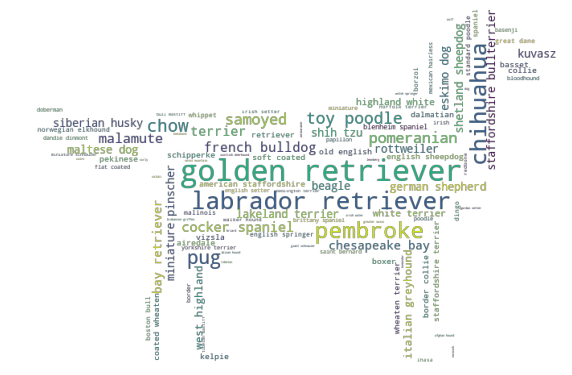

In [ ]:
#create wordcloud to visualize the most predicted dog breeds
breed_text = ' '.join([w for w in test_df['breed']])
mwc2 = WordCloud(background_color = None, mask = mask, mode = 'RGBA')
mwc2.generate(breed_text)
plt.figure(figsize=(10,10))
plt.imshow(mwc2)
plt.axis('off')
plt.show()